In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import pandas as pd
import numpy as np
import os
from os.path import join, isdir, dirname, basename, exists
from os import mkdir
#import nibabel as nib
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.5)

In [3]:
eCON = '/data/bswift-1/Pessoa_Lab/eCON'
bucket_path = join(eCON,'dataset/results_ShockUncensored/{subj}/{group}/splitted_regs/ROI_analysis/noProx/buttonPress/{subj}_bucket_REML_clean.1D')

In [4]:
np.loadtxt(bucket_path.format(subj='CON001',group='controllable')).shape

(24, 45)

In [5]:
yoked = pd.read_excel(join(eCON,'onsetdir/CON_yoked_table.xlsx'))
yoked = yoked.query('use == 1')

In [6]:
rois = 'rBNST lBNST rdAI rvAI vmPFC PCC1 rPAG lPAG PCC2 ldAI\
        lvAI rPI lPI rCa lCa rPa lPa rVS lVS Amygdala_BLBM_La_L\
        Amygdala_BLBM_La_R Amygdala_CeME_L Amygdala_CeME_R ACC'.split()

In [7]:
len(rois)

24

In [8]:
def combine_beta(beta,t):
    weights = (t/beta)**2
    combined_beta = np.sum(weights*beta,axis=1)/np.sum(weights,axis=1)
    return combined_beta

In [9]:
if exists('Individual_betas_from_ROI_analysis_S_buttonPress.csv'):
    main_df = pd.read_csv('Individual_betas_from_ROI_analysis_S_buttonPress.csv')
else:
    main_df = pd.DataFrame()
    for i, row in yoked.iterrows():
        pair = i
        for kind in ['control','uncontrol']:
            subj = row[kind]
            nruns = np.sum(row.loc['run0':'run5'].astype(bool))
            group = kind+'lable'
            data = np.loadtxt(bucket_path.format(subj=subj,group=group))
            shock_est = data[:,25:][:,:nruns*2]
            beta = shock_est[:,::2]
            t = shock_est[:,1::2]
            combined_beta = combine_beta(beta=beta,t=t)
            tmp_df = pd.DataFrame(combined_beta,index=rois).T
            tmp_df['Pair'] = 'P{:02d}'.format(i)
            tmp_df['Subject'] = subj
            tmp_df['Group'] = kind
            main_df = pd.concat([main_df,tmp_df],axis=0,ignore_index=True)
            
    main_df = pd.melt(main_df,id_vars=['Pair','Subject','Group'],var_name='ROI',value_name='beta')
    main_df.to_csv('Individual_betas_from_ROI_analysis_S_buttonPress.csv',index=False)

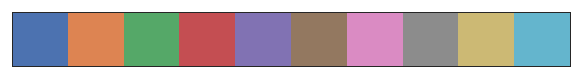

In [10]:
pal = sns.color_palette()
sns.palplot(pal)